In [1]:
from intrinsic.module import PlasticEdges
from intrinsic.model import Intrinsic
import numpy as np
import torch
from matplotlib import pyplot as plt

In [2]:
rnet = Intrinsic(num_nodes=3, node_shape=(1, 3, 5, 5), kernel_size=3, edge_module=PlasticEdges, track_activation_history=True, mask=None, inject_noise=False)

Using kernel 3  and pad 1


In [3]:
for i in range(1000):
    rnet()

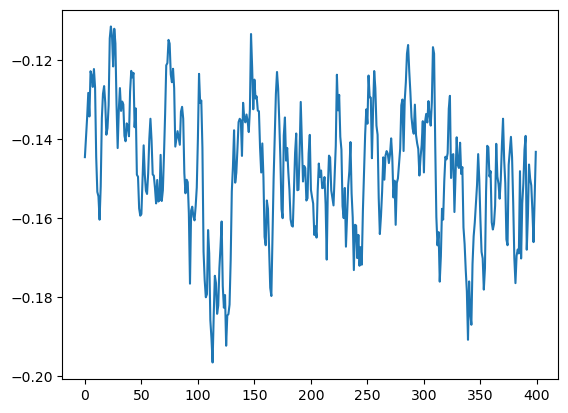

In [4]:
history = rnet.past_states
history = np.array([s.detach().squeeze().numpy() for s in history])
plt.plot(history[200:600, 2, 1, 0, 1])

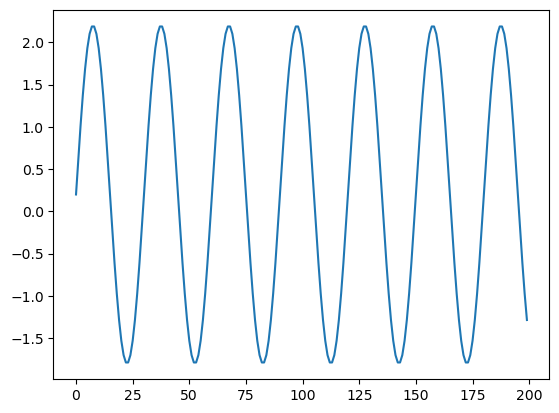

In [14]:
x = torch.arange(0, 200)
target_pattern = 2 * torch.sin((x * 4 * torch.pi) / 60) + .2
plt.plot(target_pattern)

In [20]:
optim = torch.optim.Adam(params=rnet.parameters(), lr=.001)
for gen in range(1000):
    rnet.past_states = []
    rnet = rnet.detach(reset_intrinsic=True)
    optim.zero_grad()
    for i in range(200):
        rnet()
    history = torch.stack(rnet.past_states)
    node_history = history[:, 2, 1, 1, 1].squeeze()
    loss = torch.sqrt(torch.sum((target_pattern - node_history) ** 2))
    print("gen", gen, "loss", loss)
    loss.backward()
    optim.step()

gen 0 loss tensor(17.9310, grad_fn=<SqrtBackward0>)
gen 1 loss tensor(19.5982, grad_fn=<SqrtBackward0>)
gen 2 loss tensor(20.0693, grad_fn=<SqrtBackward0>)
gen 3 loss tensor(19.5139, grad_fn=<SqrtBackward0>)
gen 4 loss tensor(19.3477, grad_fn=<SqrtBackward0>)
gen 5 loss tensor(19.4024, grad_fn=<SqrtBackward0>)
gen 6 loss tensor(19.4029, grad_fn=<SqrtBackward0>)
gen 7 loss tensor(19.4451, grad_fn=<SqrtBackward0>)
gen 8 loss tensor(19.3460, grad_fn=<SqrtBackward0>)
gen 9 loss tensor(19.2240, grad_fn=<SqrtBackward0>)
gen 10 loss tensor(19.1621, grad_fn=<SqrtBackward0>)
gen 11 loss tensor(19.3116, grad_fn=<SqrtBackward0>)
gen 12 loss tensor(19.2561, grad_fn=<SqrtBackward0>)
gen 13 loss tensor(19.0728, grad_fn=<SqrtBackward0>)
gen 14 loss tensor(19.0750, grad_fn=<SqrtBackward0>)
gen 15 loss tensor(19.0674, grad_fn=<SqrtBackward0>)
gen 16 loss tensor(19.1037, grad_fn=<SqrtBackward0>)
gen 17 loss tensor(19.0972, grad_fn=<SqrtBackward0>)
gen 18 loss tensor(18.9643, grad_fn=<SqrtBackward0>)
gen

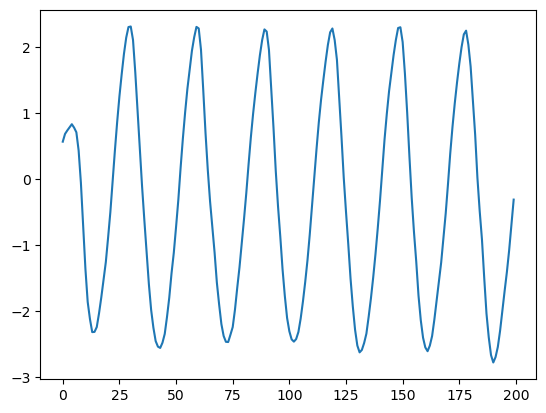

In [25]:
plt.plot(history[0:, 2, 1, 3, 1].detach().numpy())

In [26]:
print(rnet.edge.plasticity.detach().numpy())

[[0.15773189 0.26202068 0.21032955]
 [0.32429138 0.20973065 0.28970712]
 [0.00214322 0.27194372 0.11205312]]


In [27]:
print(rnet.edge.chan_map.detach().numpy())

[[[[ 2.3112933e-01 -6.2207633e-04 -3.0379933e-01]
   [ 3.5701424e-02  2.2174753e-04  3.2947326e-01]
   [ 3.2172796e-01 -2.4227814e-01 -1.4696375e-02]]

  [[-8.8883102e-02  5.7767905e-02  4.9965963e-02]
   [ 1.3348827e-01 -5.1154613e-02  4.6298522e-01]
   [ 2.9642239e-01  1.7641236e-01 -2.7406517e-01]]

  [[-8.7717526e-02 -3.0058065e-01  7.5507574e-02]
   [-1.4565393e-01 -7.2579712e-02  5.5479544e-01]
   [-2.9708130e-02 -7.8416735e-02 -1.5128198e-01]]]


 [[[ 2.2940847e-01 -1.4163494e-01  2.1237895e-01]
   [ 1.4886989e-01  4.8917215e-02 -2.3291101e-01]
   [-3.4283180e-02 -2.0987916e-01 -5.5665191e-02]]

  [[-1.0754065e-01  1.7363328e-01  1.3308626e-01]
   [ 4.0529903e-02 -1.0954576e-01 -3.3786795e-03]
   [ 1.7355090e-01  1.4451224e-01  3.3360249e-01]]

  [[ 1.7391898e-02 -7.6539792e-02 -9.4767250e-02]
   [ 4.5127380e-01  1.2288119e-01  4.4743872e-01]
   [-1.3065800e-01 -2.1110496e-01  4.6416023e-03]]]


 [[[-2.1593778e-01  2.1553248e-01 -2.4294248e-02]
   [-2.7516761e-01  8.6814612e-02 

In [82]:
print(torch.linalg.inv(rnet.edge.chan_map.detach()).numpy())

[[[[ -0.08461952  -9.81863     -1.0084908 ]
   [ -8.998171   -16.758099     3.9929547 ]
   [ 18.79587     34.43395     -2.7849865 ]]

  [[  0.31422818   2.6590745   -0.25242126]
   [  7.806445    -4.0857563   -3.4667757 ]
   [ -3.9496303   -2.4399648   -2.1275716 ]]

  [[-17.95021     16.927073    12.617822  ]
   [ -1.8655443   10.250759     8.696033  ]
   [  7.747307    -6.278515    -1.5172448 ]]]


 [[[  1.4679397    1.3634266   -4.620438  ]
   [  5.550851     0.78056586   9.969932  ]
   [ -2.6670234   -3.6459546   -1.8146535 ]]

  [[  9.067473    -1.2897989   -3.8540099 ]
   [  3.0264132   -4.597727    -1.4854023 ]
   [ -0.9567399    3.6697605    3.2543886 ]]

  [[ -9.013781    -8.344684    -2.461739  ]
   [  2.7989373    4.4629645    4.014318  ]
   [  4.096323     7.0156527   -4.015288  ]]]


 [[[  2.1382594    3.451552    -0.04529504]
   [ -8.369789     4.4112563   -4.841305  ]
   [  1.5478146    1.6748391    5.9367003 ]]

  [[  1.0847011    4.6144123   -0.99706006]
   [  1.739712